# Facial Keypoints Detection

In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('../facial-keypoints-detection/training.csv', header=0, sep=',', quotechar='"')
test_data = pd.read_csv('../facial-keypoints-detection/test.csv', header=0, sep=',', quotechar='"')
IdLookupTable = pd.read_csv('../facial-keypoints-detection/IdLookupTable.csv',header=0, sep=',', quotechar='"')
SampleSubmission = pd.read_csv('../facial-keypoints-detection/SampleSubmission.csv',header=0, sep=',', quotechar='"')

In [3]:
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [31]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

## Which columns have missing values?

In [5]:
for i in train_data.columns:
    print(i,"has",sum(train_data[i].isna()),"missing values")

left_eye_center_x has 10 missing values
left_eye_center_y has 10 missing values
right_eye_center_x has 13 missing values
right_eye_center_y has 13 missing values
left_eye_inner_corner_x has 4778 missing values
left_eye_inner_corner_y has 4778 missing values
left_eye_outer_corner_x has 4782 missing values
left_eye_outer_corner_y has 4782 missing values
right_eye_inner_corner_x has 4781 missing values
right_eye_inner_corner_y has 4781 missing values
right_eye_outer_corner_x has 4781 missing values
right_eye_outer_corner_y has 4781 missing values
left_eyebrow_inner_end_x has 4779 missing values
left_eyebrow_inner_end_y has 4779 missing values
left_eyebrow_outer_end_x has 4824 missing values
left_eyebrow_outer_end_y has 4824 missing values
right_eyebrow_inner_end_x has 4779 missing values
right_eyebrow_inner_end_y has 4779 missing values
right_eyebrow_outer_end_x has 4813 missing values
right_eyebrow_outer_end_y has 4813 missing values
nose_tip_x has 0 missing values
nose_tip_y has 0 missi

All rows have an Image. Most rows have a:
* nose_tip (x, y)
* left_eye_center (x,y)
* right_eye_center (x,y)
* mouth_center_bottom_lip (x,y)

## How many rows have missing values?

In [22]:
missing_counts=[]
i=0
for i in range(train_data.shape[0]):
    row=train_data.iloc[i,:]
    missing_count=sum(row.isna())
    if missing_count !=0:
        print("row",i,"has",missing_count,"missing values")
        missing_counts.append(missing_count)

row 210 has 2 missing values
row 350 has 2 missing values
row 499 has 2 missing values
row 512 has 2 missing values
row 810 has 2 missing values
row 839 has 2 missing values
row 895 has 2 missing values
row 1058 has 2 missing values
row 1194 has 2 missing values
row 1230 has 2 missing values
row 1245 has 2 missing values
row 1546 has 2 missing values
row 1548 has 2 missing values
row 1585 has 2 missing values
row 1588 has 2 missing values
row 1598 has 2 missing values
row 1601 has 2 missing values
row 1605 has 2 missing values
row 1620 has 10 missing values
row 1624 has 2 missing values
row 1626 has 2 missing values
row 1627 has 2 missing values
row 1629 has 2 missing values
row 1636 has 8 missing values
row 1643 has 6 missing values
row 1646 has 6 missing values
row 1647 has 2 missing values
row 1652 has 4 missing values
row 1654 has 2 missing values
row 1678 has 2 missing values
row 1679 has 2 missing values
row 1684 has 2 missing values
row 1685 has 4 missing values
row 1687 has 6 m

row 2487 has 22 missing values
row 2488 has 22 missing values
row 2489 has 22 missing values
row 2490 has 22 missing values
row 2491 has 22 missing values
row 2492 has 22 missing values
row 2493 has 22 missing values
row 2494 has 22 missing values
row 2495 has 22 missing values
row 2496 has 22 missing values
row 2497 has 22 missing values
row 2498 has 22 missing values
row 2499 has 22 missing values
row 2500 has 22 missing values
row 2501 has 22 missing values
row 2502 has 22 missing values
row 2503 has 22 missing values
row 2504 has 22 missing values
row 2505 has 22 missing values
row 2506 has 22 missing values
row 2507 has 22 missing values
row 2508 has 22 missing values
row 2509 has 22 missing values
row 2510 has 22 missing values
row 2511 has 22 missing values
row 2512 has 22 missing values
row 2513 has 22 missing values
row 2514 has 22 missing values
row 2515 has 22 missing values
row 2516 has 22 missing values
row 2517 has 22 missing values
row 2518 has 22 missing values
row 2519

row 2782 has 22 missing values
row 2783 has 22 missing values
row 2784 has 22 missing values
row 2785 has 22 missing values
row 2786 has 22 missing values
row 2787 has 22 missing values
row 2788 has 22 missing values
row 2789 has 22 missing values
row 2790 has 22 missing values
row 2791 has 22 missing values
row 2792 has 22 missing values
row 2793 has 22 missing values
row 2794 has 22 missing values
row 2795 has 22 missing values
row 2796 has 22 missing values
row 2797 has 22 missing values
row 2798 has 22 missing values
row 2799 has 22 missing values
row 2800 has 22 missing values
row 2801 has 22 missing values
row 2802 has 22 missing values
row 2803 has 22 missing values
row 2804 has 22 missing values
row 2805 has 22 missing values
row 2806 has 22 missing values
row 2807 has 22 missing values
row 2808 has 22 missing values
row 2809 has 22 missing values
row 2810 has 22 missing values
row 2811 has 22 missing values
row 2812 has 22 missing values
row 2813 has 22 missing values
row 2814

row 3265 has 22 missing values
row 3266 has 22 missing values
row 3267 has 22 missing values
row 3268 has 22 missing values
row 3269 has 22 missing values
row 3270 has 22 missing values
row 3271 has 22 missing values
row 3272 has 22 missing values
row 3273 has 22 missing values
row 3274 has 22 missing values
row 3275 has 22 missing values
row 3276 has 22 missing values
row 3277 has 22 missing values
row 3278 has 22 missing values
row 3279 has 22 missing values
row 3280 has 22 missing values
row 3281 has 22 missing values
row 3282 has 22 missing values
row 3283 has 22 missing values
row 3284 has 22 missing values
row 3285 has 22 missing values
row 3286 has 22 missing values
row 3287 has 22 missing values
row 3288 has 22 missing values
row 3289 has 22 missing values
row 3290 has 22 missing values
row 3291 has 22 missing values
row 3292 has 22 missing values
row 3293 has 22 missing values
row 3294 has 22 missing values
row 3295 has 22 missing values
row 3296 has 24 missing values
row 3297

row 3786 has 22 missing values
row 3787 has 22 missing values
row 3788 has 22 missing values
row 3789 has 22 missing values
row 3790 has 22 missing values
row 3791 has 22 missing values
row 3792 has 22 missing values
row 3793 has 22 missing values
row 3794 has 22 missing values
row 3795 has 22 missing values
row 3796 has 22 missing values
row 3797 has 22 missing values
row 3798 has 22 missing values
row 3799 has 22 missing values
row 3800 has 22 missing values
row 3801 has 22 missing values
row 3802 has 22 missing values
row 3803 has 22 missing values
row 3804 has 22 missing values
row 3805 has 22 missing values
row 3806 has 22 missing values
row 3807 has 22 missing values
row 3808 has 22 missing values
row 3809 has 22 missing values
row 3810 has 22 missing values
row 3811 has 22 missing values
row 3812 has 22 missing values
row 3813 has 22 missing values
row 3814 has 22 missing values
row 3815 has 22 missing values
row 3816 has 22 missing values
row 3817 has 22 missing values
row 3818

row 4284 has 22 missing values
row 4285 has 22 missing values
row 4286 has 22 missing values
row 4287 has 22 missing values
row 4288 has 22 missing values
row 4289 has 22 missing values
row 4290 has 22 missing values
row 4291 has 22 missing values
row 4292 has 22 missing values
row 4293 has 22 missing values
row 4294 has 22 missing values
row 4295 has 22 missing values
row 4296 has 22 missing values
row 4297 has 22 missing values
row 4298 has 22 missing values
row 4299 has 22 missing values
row 4300 has 22 missing values
row 4301 has 22 missing values
row 4302 has 22 missing values
row 4303 has 22 missing values
row 4304 has 22 missing values
row 4305 has 22 missing values
row 4306 has 22 missing values
row 4307 has 22 missing values
row 4308 has 22 missing values
row 4309 has 22 missing values
row 4310 has 22 missing values
row 4311 has 22 missing values
row 4312 has 22 missing values
row 4313 has 22 missing values
row 4314 has 22 missing values
row 4315 has 22 missing values
row 4316

row 4787 has 22 missing values
row 4788 has 22 missing values
row 4789 has 22 missing values
row 4790 has 22 missing values
row 4791 has 22 missing values
row 4792 has 22 missing values
row 4793 has 22 missing values
row 4794 has 22 missing values
row 4795 has 22 missing values
row 4796 has 22 missing values
row 4797 has 22 missing values
row 4798 has 22 missing values
row 4799 has 22 missing values
row 4800 has 22 missing values
row 4801 has 22 missing values
row 4802 has 22 missing values
row 4803 has 22 missing values
row 4804 has 22 missing values
row 4805 has 22 missing values
row 4806 has 22 missing values
row 4807 has 22 missing values
row 4808 has 22 missing values
row 4809 has 22 missing values
row 4810 has 22 missing values
row 4811 has 22 missing values
row 4812 has 22 missing values
row 4813 has 22 missing values
row 4814 has 22 missing values
row 4815 has 22 missing values
row 4816 has 22 missing values
row 4817 has 22 missing values
row 4818 has 22 missing values
row 4819

row 5298 has 22 missing values
row 5299 has 22 missing values
row 5300 has 22 missing values
row 5301 has 22 missing values
row 5302 has 22 missing values
row 5303 has 22 missing values
row 5304 has 22 missing values
row 5305 has 22 missing values
row 5306 has 22 missing values
row 5307 has 22 missing values
row 5308 has 22 missing values
row 5309 has 22 missing values
row 5310 has 22 missing values
row 5311 has 22 missing values
row 5312 has 22 missing values
row 5313 has 22 missing values
row 5314 has 22 missing values
row 5315 has 22 missing values
row 5316 has 22 missing values
row 5317 has 22 missing values
row 5318 has 22 missing values
row 5319 has 22 missing values
row 5320 has 22 missing values
row 5321 has 22 missing values
row 5322 has 22 missing values
row 5323 has 22 missing values
row 5324 has 22 missing values
row 5325 has 22 missing values
row 5326 has 22 missing values
row 5327 has 22 missing values
row 5328 has 22 missing values
row 5329 has 22 missing values
row 5330

row 5584 has 22 missing values
row 5585 has 22 missing values
row 5586 has 22 missing values
row 5587 has 22 missing values
row 5588 has 22 missing values
row 5589 has 22 missing values
row 5590 has 22 missing values
row 5591 has 22 missing values
row 5592 has 22 missing values
row 5593 has 22 missing values
row 5594 has 22 missing values
row 5595 has 22 missing values
row 5596 has 22 missing values
row 5597 has 22 missing values
row 5598 has 22 missing values
row 5599 has 22 missing values
row 5600 has 22 missing values
row 5601 has 22 missing values
row 5602 has 22 missing values
row 5603 has 22 missing values
row 5604 has 22 missing values
row 5605 has 22 missing values
row 5606 has 22 missing values
row 5607 has 22 missing values
row 5608 has 22 missing values
row 5609 has 22 missing values
row 5610 has 22 missing values
row 5611 has 22 missing values
row 5612 has 22 missing values
row 5613 has 22 missing values
row 5614 has 22 missing values
row 5615 has 22 missing values
row 5616

row 6086 has 22 missing values
row 6087 has 22 missing values
row 6088 has 22 missing values
row 6089 has 22 missing values
row 6090 has 22 missing values
row 6091 has 22 missing values
row 6092 has 22 missing values
row 6093 has 22 missing values
row 6094 has 22 missing values
row 6095 has 22 missing values
row 6096 has 22 missing values
row 6097 has 22 missing values
row 6098 has 22 missing values
row 6099 has 22 missing values
row 6100 has 22 missing values
row 6101 has 22 missing values
row 6102 has 22 missing values
row 6103 has 22 missing values
row 6104 has 22 missing values
row 6105 has 22 missing values
row 6106 has 22 missing values
row 6107 has 22 missing values
row 6108 has 22 missing values
row 6109 has 22 missing values
row 6110 has 22 missing values
row 6111 has 22 missing values
row 6112 has 22 missing values
row 6113 has 22 missing values
row 6114 has 22 missing values
row 6115 has 22 missing values
row 6116 has 22 missing values
row 6117 has 22 missing values
row 6118

row 6592 has 22 missing values
row 6593 has 22 missing values
row 6594 has 22 missing values
row 6595 has 22 missing values
row 6596 has 22 missing values
row 6597 has 22 missing values
row 6598 has 22 missing values
row 6599 has 22 missing values
row 6600 has 22 missing values
row 6601 has 22 missing values
row 6602 has 22 missing values
row 6603 has 22 missing values
row 6604 has 22 missing values
row 6605 has 22 missing values
row 6606 has 22 missing values
row 6607 has 22 missing values
row 6608 has 22 missing values
row 6609 has 22 missing values
row 6610 has 22 missing values
row 6611 has 22 missing values
row 6612 has 22 missing values
row 6613 has 22 missing values
row 6614 has 22 missing values
row 6615 has 22 missing values
row 6616 has 22 missing values
row 6617 has 22 missing values
row 6618 has 22 missing values
row 6619 has 22 missing values
row 6620 has 22 missing values
row 6621 has 22 missing values
row 6622 has 22 missing values
row 6623 has 22 missing values
row 6624

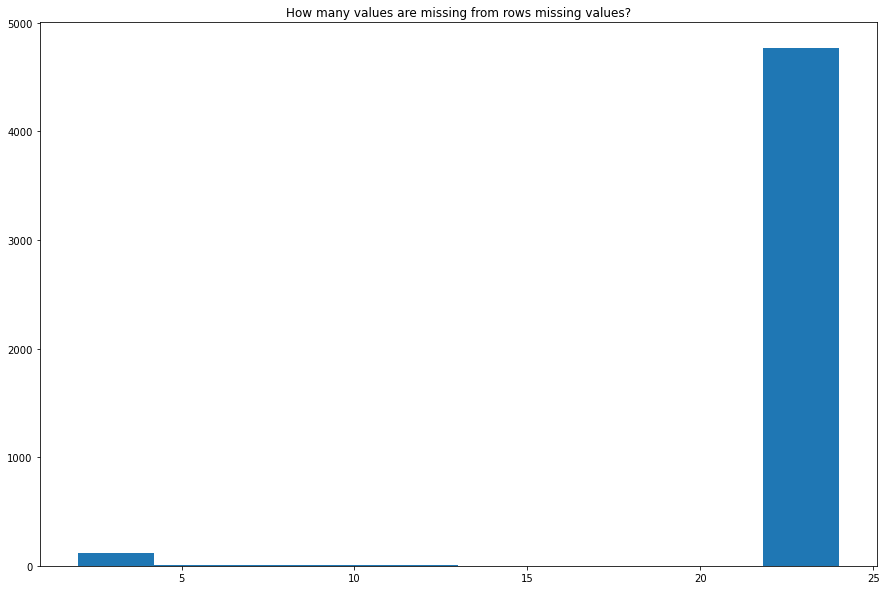

In [29]:
missing_array=np.array(missing_counts)
fig, ax = plt.subplots(figsize =(15, 10)) 
ax.hist(missing_array)
plt.title("How many values are missing from rows missing values?")
plt.show()

In [27]:
pd.Series(missing_array).value_counts()

22    4755
2       87
4       28
24      10
6        9
8        8
12       5
10       3
14       2
20       2
dtype: int64

## What do the values we do have look like?

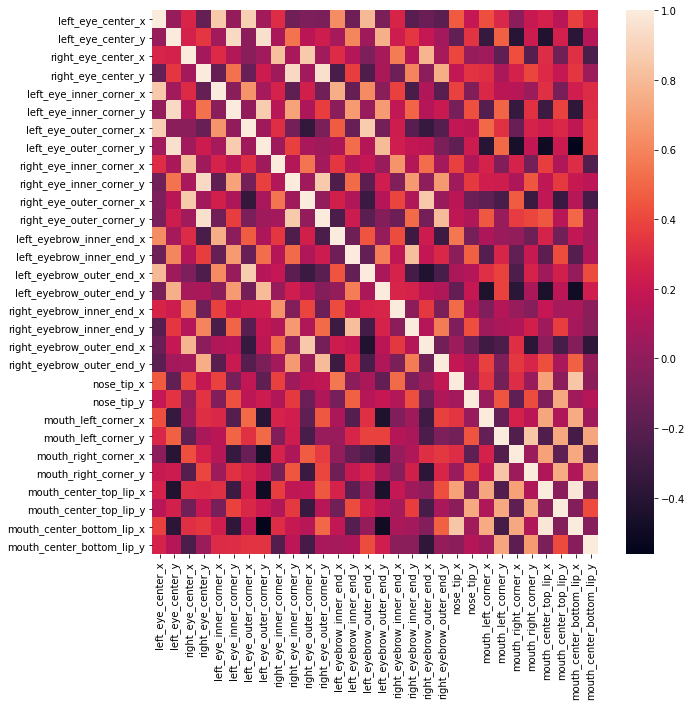

In [37]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sns.heatmap(train_data.corr(),ax=ax)

It looks like the center values are pretty highly correlated with the outer/inner corner of eye and eyebrow. This could mean we might be able to make a reasonable guess at imputing a value for these missing columns if we have the center value.

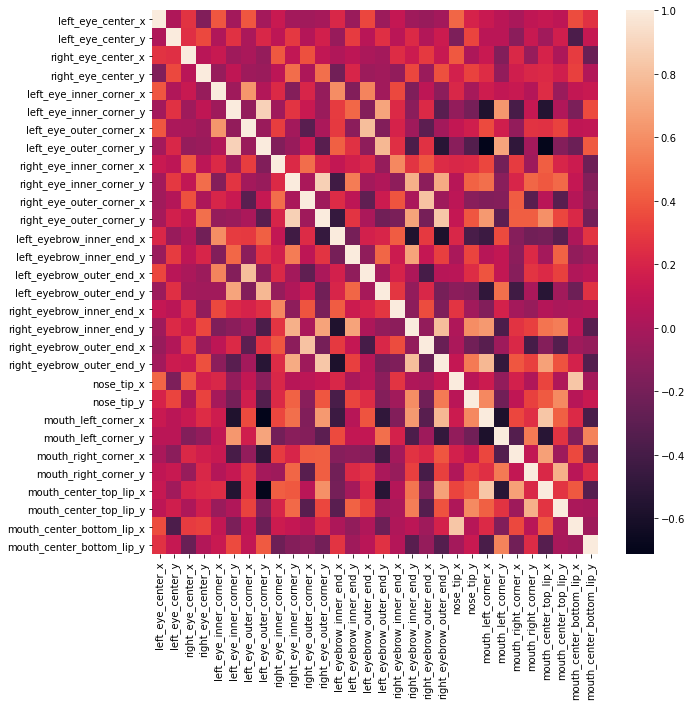

In [36]:
new_data=train_data.fillna(method='ffill')
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sns.heatmap(new_data.corr(),ax=ax)

Correlation decreased a lot using ffill to fill in nulls...

## Looking at the values we do have

In [38]:
train_data.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


## Drawing some images

In [54]:
first_image=np.array(train_data['Image'][0].split(" "),dtype="int").reshape(96,96)

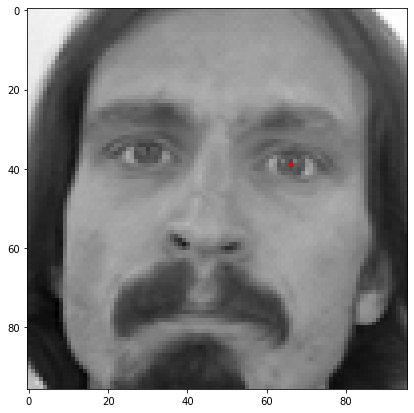

In [59]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.imshow(first_image.reshape(96,96), cmap = 'gray')

ax.scatter(train_data["left_eye_center_x"][0],train_data["left_eye_center_y"][0],color="red",marker="+")